# Defining Play Recognition Rates for Defenders
Metric Track | Authored by: __[Drew Shayotovich](https://www.linkedin.com/in/drewshayotovich/)__

---

### Introduction
The ability to diagnose plays quickly is a crucial attribute for defensive players in the NFL. While the best NFL scouts and analysts can subjectively evaluate a defender's play recognition, the evolution of player-tracking data enables us to measure this capability objectively. Here, I will introduce a new metric that quantifies a defender's play recognition ability by analyzing their instantaneous physical responses combined with play outcomes.

There are two main factors used in determining play recognition: (i) acceleration and (ii) expected points added (EPA). By evaluating each defender's acceleration across the first second of a given play, comparing it to nominal acceleration values for the player, and determining the outcome of the play, the goal is to ultimately classify a defender's recognition into one of five categories on each play:
1. <b>Nominal: </b>It should be assumed that most plays fall into a nominal category of read and react. The defender has some idea of play recognition based on film study, offensive cues, etc., but ultimately will read and react as the play develops. The read and react phase will be defined by falling within a defined range of their average acceleration
2. <b>Recognized: </b>A recognized play can be defined as one where the defender is moving at a higher-than-average acceleration and results in a negative EPA (i.e., a successful play for the defense)
3. <b>Passive: </b>Successful plays are not exclusive to high acceleration rates; whether due to the defender's play-specific responsibility, offensive formation, or other, the defender has a lower-than-average acceleration, but the defense still yielded a negative EPA
4. <b>Fooled: </b>A defender is considered to be fooled when they are moving at a higher-than-average acceleration, similar to a recognized play, but the play results in a positive EPA (i.e., a successful play for the offense)
5. <b>Confused: </b>A defender is considered to be confused when they are moving at a lower-than-average acceleration, and the offense achieves a positive EPA for the play

A visual demonstration of the five (5) categories is shown in Figure 1 below. This is an example play recognition chart for a single defender where each data point represents a play (two games' worth of data).<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;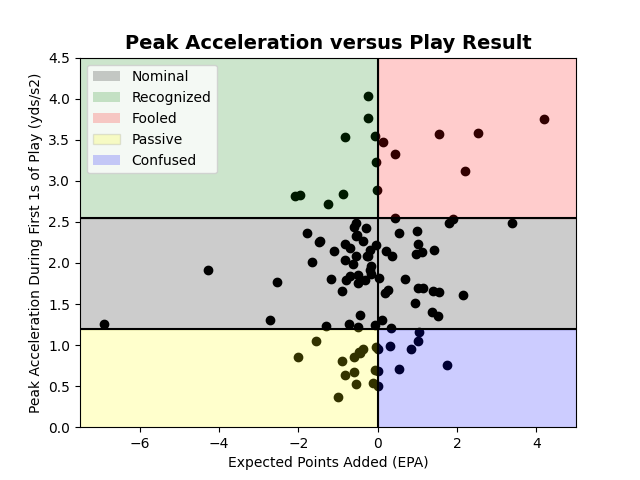<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<i>Figure 1: Example Play Recognition Chart for a Single Defender</i>

With each of these categories defined, it allows us to define two separate recognition rates:
1. <b>High Acceleration Recognition Rate (HARR): </b>This category is defined by the number of points in the 'Recognized' zone versus the 'Fooled' zone. It is calculated as a percentage of total plays above the high acceleration threshold such that it points to the likelihood the defense has a successful outcome (i.e., negative EPA) if the given player is accelerating faster than normal during the first 1 second of the play.
2. <b>Low Acceleration Recognition Rate (LARR): </b>Similarly, the low acceleration category is defined by the number of points in the 'Passive' zone versus the 'Confused' zone. It demonstrates the likelihood of a successful play for the defense if the given player is accelerating slower than normal during the first 1 second of the play.

Early play acceleration by defensive players is inherently dependent on offensive pre-snap motion; generally speaking, acceleration measurements in the first (1) second of a given play will be higher if the defense is responding to pre-snap motion. Therefore, motion and non-motion plays should be evaluated separately. Separating offensive plays into motion and non-motion datasets is a good practice from a statistical standpoint for the recognition metric, but it also provides the opportunity to evaluate how individual defenders' recognition rates differ for motion versus non-motion plays. For example, a player with a large difference in HARR between motion and non-motion plays would indicate that the player is better (or worse) at recognizing offensive plays based on pre-snap motion. 

The following sections will show examples of some of the data analysis used to come up with the HARR and LARR metrics, review examples from the 2022 NFL season, discuss potential applications and usages of the metric, and discuss potential improvements and further developments of the metric.

### Data Analysis
#### Required Datasets
There are three main datasets required to produce the HARR and LARR metrics:
1. <b>Players: </b>The required key variable is 'nflId'. Optional inclusion of the 'displayName' variable will provide relevant information for data labeling, and the 'position' variable will allow for additional position or group-specific analysis
2. <b>Plays: </b>The required key variables are 'gameId' and 'playId'. Additionally, an EPA value is required for each play, which allows for differentiation between successful and unsuccessful plays.
3. <b>Tracking: </b>The required key variables are 'gameId', 'playId', and 'nflId'. A variable for categorizing key events is required to denote (i) when the offense is set and (ii) when the ball is snapped. At a minimum, x/y coordinates and acceleration values from when the offense is set through the first 1 second of the play is required. These coordinates and acceleration are used to (i) separate motion and non-motion plays and (ii) determine peak acceleration for defenders.

#### Players of Interest
The players of interest for this study were defined to be non-linemen defensive players. Defensive linemen have a smaller dispersion of peak acceleration values from play to play, which makes their recognition rates less statistically significant; this smaller dispersion is logical when considering their position on the field and typical defensive scheme concepts; it is also supported by an example comparison in Figure 2.

<div>
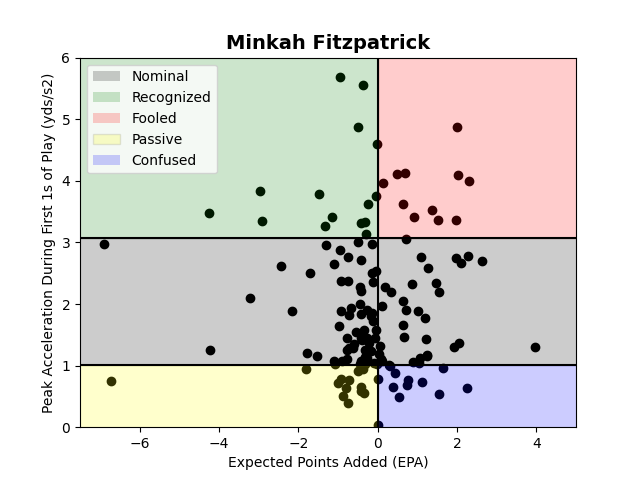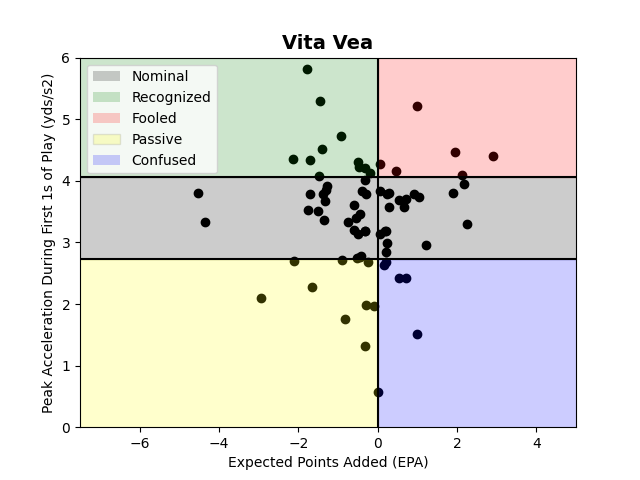
</div>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; <i>Figure 2: Comparison of Peak Acceleration dispersion between an example safety (Minkah Fitzpatrick) and nose tackle (Vita Vea)</i><br><br>

All unique nflIds were identified from the Players dataset and filtered to only include non-linemen on offense and defense. Offensive players were used to identify motion plays, while defensive players were analyzed for their recognition rates.<br><br>
&emsp;&emsp;&emsp;&emsp;<Code>off_and_def_back7 = ['OLB', 'ILB', 'MLB', 'LB', 'SS', 'FS', 'CB', 'DB', 'QB', 'RB', 'FB', 'WR', 'TE']</Code>

#### Motion versus Non-motion
A basic distance formula is applied to the Tracking dataset for each offensive player from the time the offense is set (line_set) until the ball is snapped (ball_snap). The distance traveled between these two points in time is used to determine if a given play had pre-snap motion. Players are grouped by their position and the total distance is calculated separately for backs and wideouts (including TE). To determine pre-snap motion, offensive linemen are excluded due to the low likelihood of motion. A variable is used to set the minimum distance threshold to determine if a play had motion; based on preliminary analysis, the threshold for pre-snap motion was set to 3 yards for backs and 5 yards for wideouts. Plays where <i><b>either</b></i> threshold was exceeded were marked as having motion, and others were marked as non-motion.


#### Play-specific Analysis
For each player of interest and each snap they played in, the dataframe index of the snap is identified in the overall Tracking dataset. The peak acceleration over the first 1 second of the play is identified by referencing these indexes and their 10 succeeding values (assuming data is provided in 0.1s intervals). Preliminary, high-level analysis was performed to determine which variable was most influential on EPA; see the Future Improvements Section for additional information.

In addition to player acceleration, the 'gameId' and 'playId' keys were used to identify the EPA and motion information for each play. EPA is directly referenced from the provided Plays data set. The motion of each play is queried from the Motion versus Non-motion discussion above and tracked with a boolean (has_motion) for downstream filtering. These variables are stored in a dataframe for each player.

#### Recognition Charts and Recognition Rates
Recognition Charts (as seen in Figure 1) can be generated with the dataframe developed above. As discussed in the Introduction, motion and non-motion plays should be separated before identifying the player's average peak acceleration. The 'Nominal' range of accelerations is controlled by a variable; for this report, it is set to 75% of one standard deviation in either direction, which should yield ~50% of the snaps to be in the 'Nominal' zone.

Once the 'Nominal' zone is established, HARR is calculated as the number of plays with a negative EPA <b><i>AND</b></i> peak acceleration above nominal relative to the total number of plays with peak acceleration above nominal. The LARR is similarly calculated using plays with peak acceleration below the nominal range. Figure 3 shows an example of the resulting dataframe containing the recognition data, separated by motion and non-motion plays. <br><br>
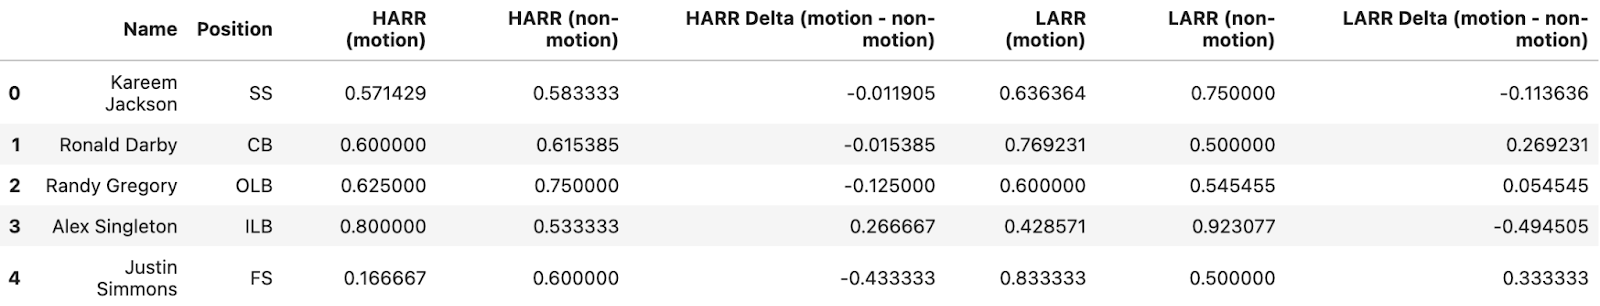
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<i>Figure 3: Header and example columns of the recognition dataframe</i><br>

The dataframe above provides the required data to generate the chart in Figure 4. For each player in the dataset, their HARR for non-motion plays is plotted versus motion plays. The chart includes a +/- 10% band to show players whose HARRs are within 10% of each other regardless of pre-snap motion. The data points of interest are those who fall on either side of the band; these are players whose HARR is significantly different for plays depending on if there is any pre-snap motion. Interpretations of Figure 4 are discussed in the following section.

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;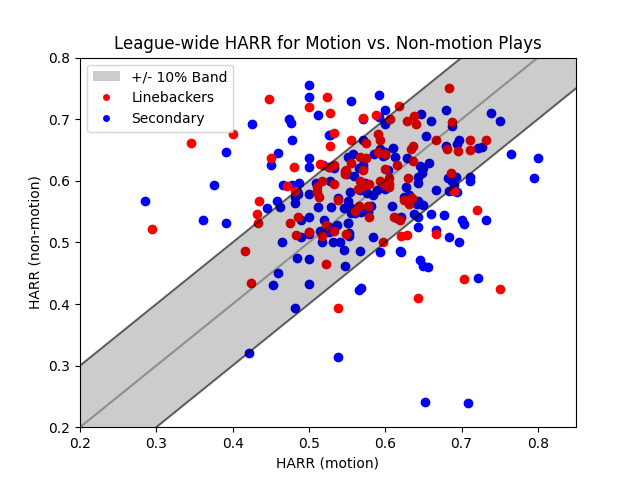<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<i>Figure 4: League-wide HARR rates for non-motion versus motion plays (2022 NFL season, Weeks 1-9, min. 250 snaps)</i>

### Applications
Figure 5 is a replication of Figure 4, with two players highlighted for gameplan demonstration:
1. <b>Isaiah Simmons: </b> had an overall success rate (% of plays with negative EPA) of 49% over 365 snaps during the first 9 weeks of 2022, including a HARR of 66% on non-motion plays. That recognition rate dropped significantly to 34% on motion plays; this is a strong indication that offenses can scheme specific motion concepts to target Simmons. If the offense can get Simmons accelerating faster than average early in the play, they will likely find success.
2. <b>Kenny Moore: </b> had an overall success rate of 57% on 515 snaps over the same time. Moore's HARR on motion versus non-motion plays were 72% and 44%, respectively. This would indicate that Moore's play (and potentially route combination) recognition abilities are much stronger when facing motion. Offensive gameplans should avoid motion to Moore's side of the field or use a heavier rate of backfield motion rather than wideout motion.

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;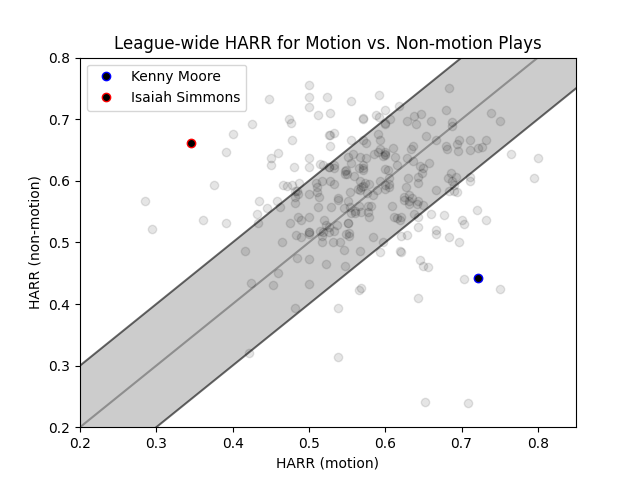<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<i>Figure 5: Isaiah Simmons and Kenny Moore non-motion versus motion HARR, highlighted</i><br>

The recognition metric could also help identify specific personnel in free agency or college scouting. Based on current personnel, defensive schemes, and team strengths/weaknesses, what skills are you looking for; need a safety who can play downhill in the run game and make plays? <i><b>Look for a high HARR player.</i></b> Are you in the NFC West and likely to see higher rates of motion [1] playing the Rams and 49ers four times? <i><b>Make sure non-motion HARR doesn't outperform their motion HARR in Figure 4.</i></b>

### Conclusion

Overall, the recognition rate metrics are in the infant stage. I hope that their potential applications in scouting, game planning, and player evaluation are recognized from this work, and I look forward to continuing to develop the metric further. Some potential opportunities I've identified to improve the metric, based on time allowed and further development of my own data analysis skills, include:
1. <b>Redefine success: </b>currently defined as negative EPA, this could be more of a player specific success metric depending on the defensive assignment or game situation
2. <b>Evaluate other metrics for dependence: </b>there is an opportunity to develop a ML model to evauate whether different variables, other than peak acceleration, are more influential in quantifying recognition rates

All of the work presented in this report was done using the datasets provided by the NFL Big Data Bowl competition and completed using Python and a basic subset of packages. With the HARR and LARR metrics established, there is no requirement for using these exact datasets or code to reproduce the metric, so long as the required information is available and the analytical reasoning is consistent. The code is provided in the __[Github Repository here](https://github.com/ashayotovich/big_data_bowl_2025)__, but the datasets are redacted for data ownership purposes.

---
Word Count: xxxx

### Acknowledgements
A special thank you to the NFL, Next Gen Stats, and the Big Data Bowl team for hosting this competition and providing the data for participants. As a lifelong football nerd with a newfound interest in data analysis, this competition was the perfect marriage. I look forward to developing more skills throughout 2025 and competing again in the years to come.

### References
[1] https://www.therams.com/news/the-rams-pre-snap-motion-always-has-a-distinct-purpose-and-the-stats-support-its-increased-usage-in-2024